In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
insta=pd.read_csv("insta.csv",index_col=0)
webscrape=pd.read_csv("price.csv",index_col=0)
all_data=pd.read_csv("all.csv",index_col=0)

In [ ]:
##display image
from PIL import Image
import urllib.request
import io

URL =insta.image_url[100]

with urllib.request.urlopen(URL) as url:
    f = io.BytesIO(url.read())

img = Image.open(f)

img.show()

In [ ]:
insta.blogger.value_counts()

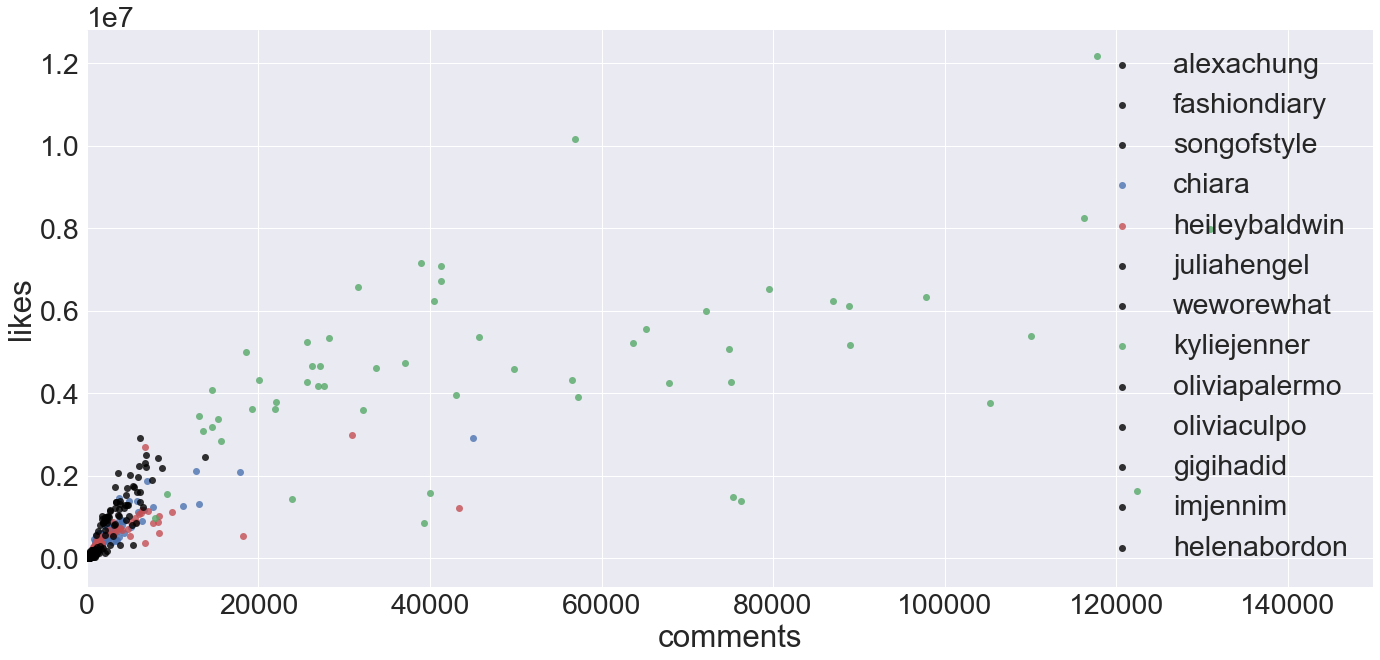

In [254]:
import seaborn as sns

#pal=dict("weworewhat"="k", "alexachung"="k","chiara"="k","songofstyle"= "k","fashiondiary"="k","oliviaculpo"="k","gigihadid"="k", "elenabordon"="k","oliviapalermo"="k","kyliejenner"="k","juliahengel"="k","heileybaldwin"="k","imjennim"="k")

#sns.set_palette("cubehelix", 13)
sns.set(font_scale=2.85)

ax=sns.lmplot(x="comments", y="likes", data=insta,fit_reg=False,hue="blogger", size=10,aspect=2, legend=False, palette=dict(weworewhat="k", alexachung="k",chiara="#4c72b0",songofstyle= "k",fashiondiary="k",oliviaculpo="k",gigihadid="k", helenabordon="k",oliviapalermo="k",kyliejenner="#55a868",juliahengel="k",heileybaldwin="#c44e52",imjennim="k"))




plt.legend(loc='lower right')
plt.xlim(0,150000)

plt.show()

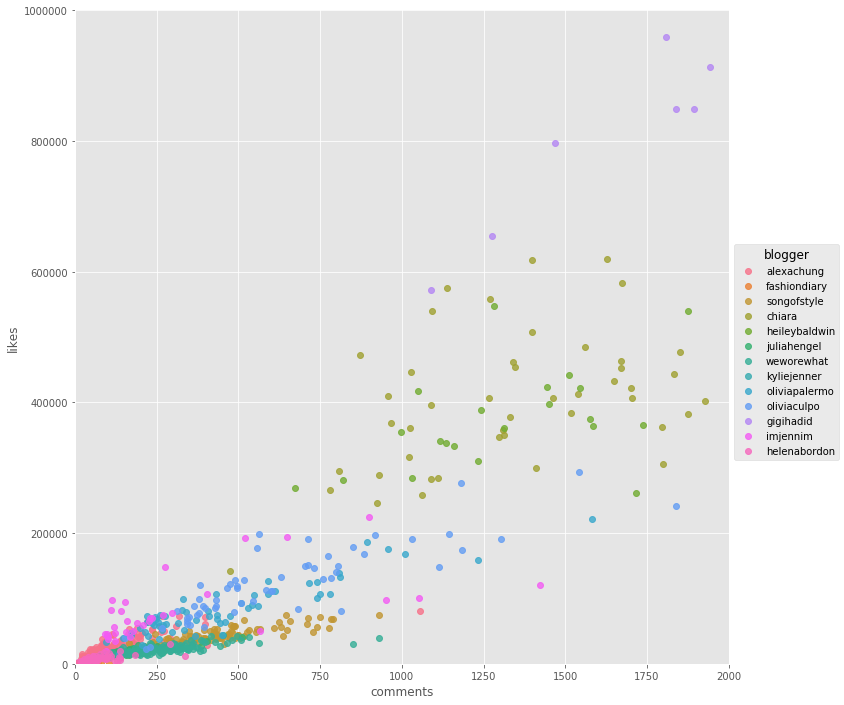

In [49]:
plot=sns.lmplot("comments", "likes", data=insta,fit_reg=False,hue="blogger", size=10)
sns.set_palette("cubehelix", 13)
plot.set(ylim=(0, 1000000))
plot.set(xlim=(0, 2000))

Text(0,0.5,'Likes')

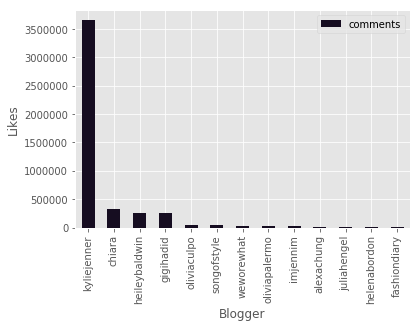

In [50]:
insta_plot=insta.groupby("blogger").agg({'comments': 'sum'}).sort_values(by="comments",ascending=False)
insta_plot.plot.bar()
plt.xlabel("Blogger")
plt.ylabel("Likes")


C:\Users\samuelmao\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The colors function was deprecated in version 2.1.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Comments')

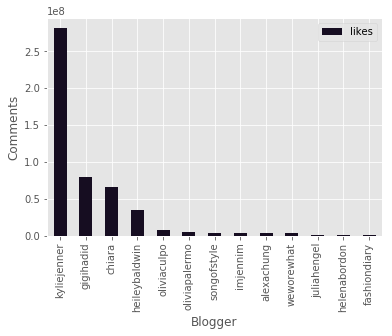

In [68]:
insta_plot_likes=insta.groupby("blogger").agg({'likes': 'sum'}).sort_values(by="likes",ascending=False)
insta_plot_likes.plot.bar()
plt.colors()
plt.xlabel("Blogger")
plt.ylabel("Comments")


C:\Users\samuelmao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'blogger' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Posts')

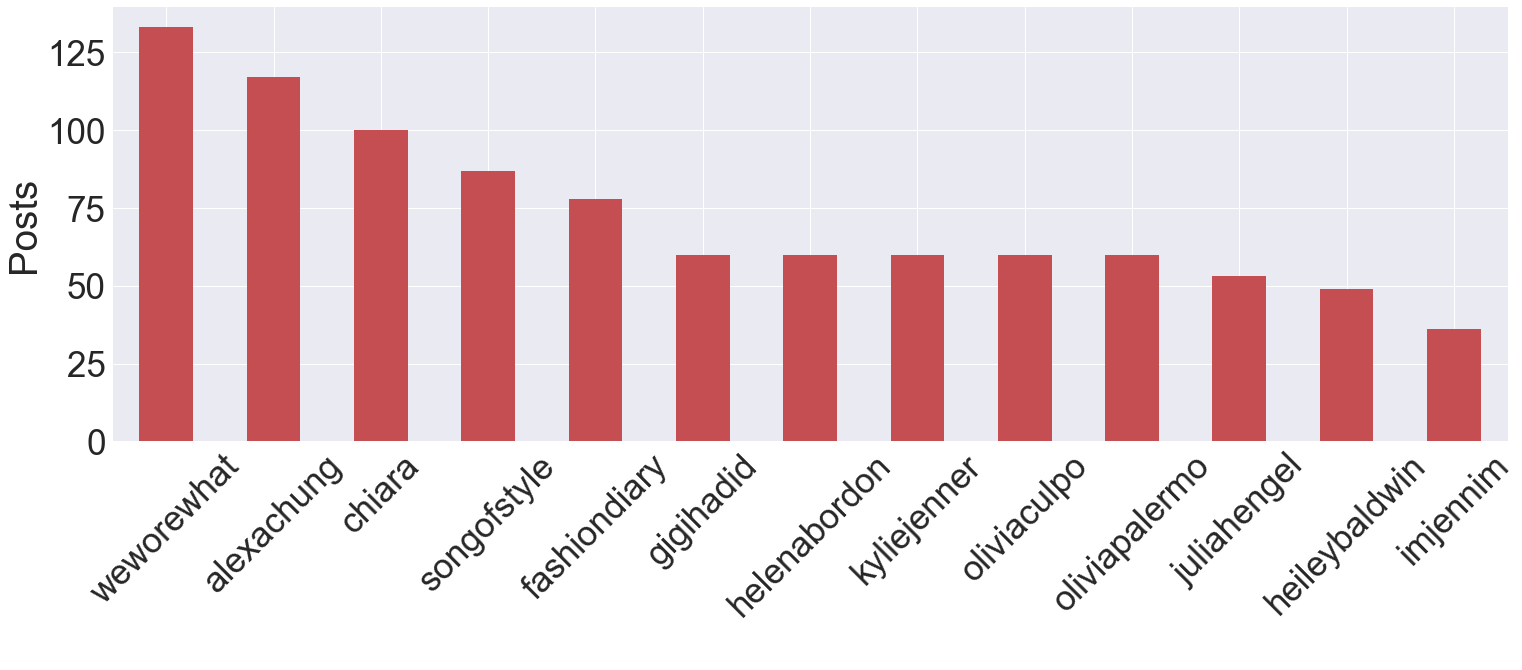

In [257]:
blogger_plot=insta.groupby("blogger").agg({"blogger":"count"}).sort_values(by="blogger",ascending=False)

blogger_plot.plot.bar(figsize=(25,8),color="#c44e52",legend=False)
sns.set(font_scale=3.5)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.ylabel("Posts")


Text(0.5,0,' ')

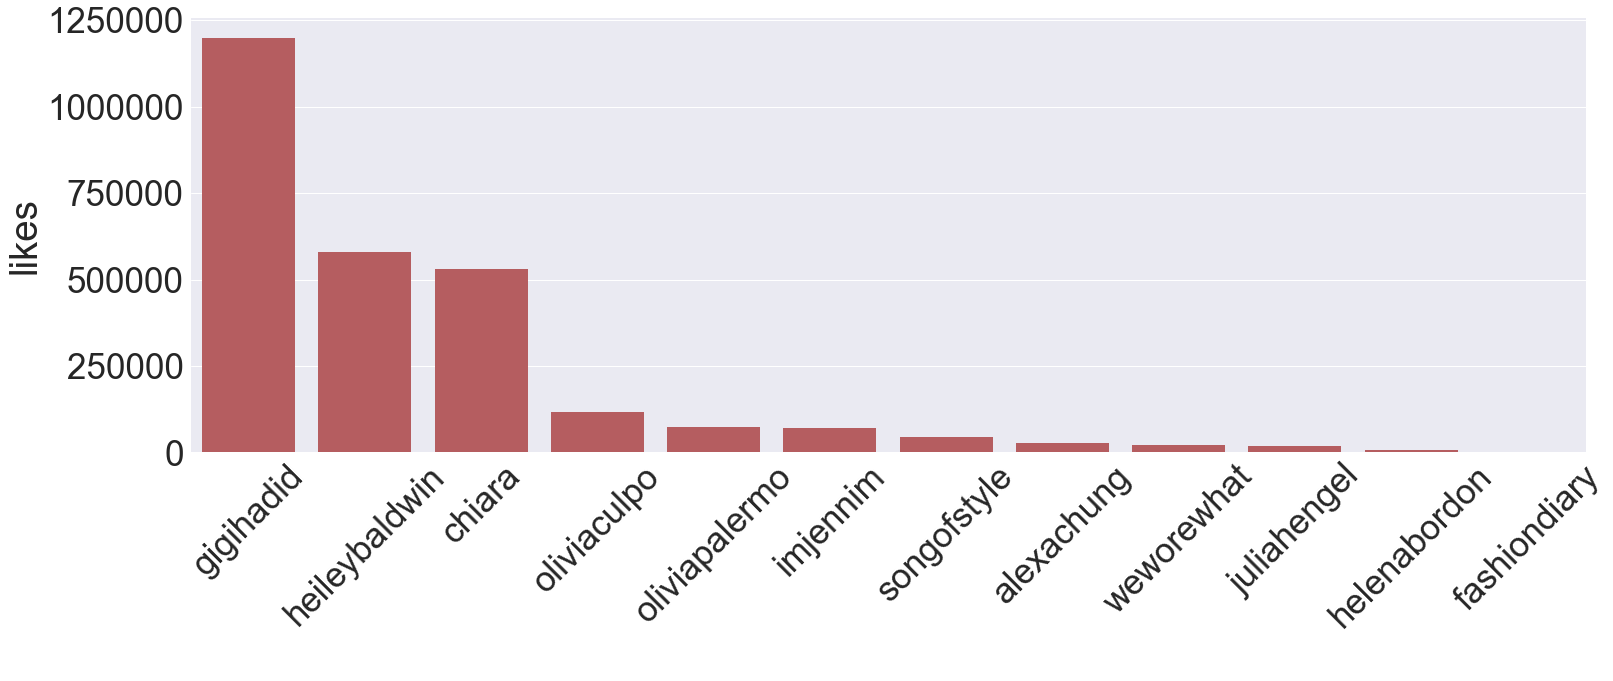

In [256]:
nokj=insta[insta.blogger!="kyliejenner"]


#likes_plot=likes_plot.reset_index()

plt.figure(figsize=(25,8))
p=sns.barplot(x="blogger", y="likes", data=likes_plot,color="#c44e52",)

sns.set(font_scale=3.5)
plt.xticks(rotation=45)
plt.xlabel(" ")
#sns.set_style("#95a5a6")
#sns.set_palette("#95a5a6")


### Webscrape Price EDA

In [88]:
print(webscrape.head(n=5))
print(webscrape.shape)

  brand category  price          product_name website
0    HM      Top   4.99        Cotton T-shirt      HM
1    HM      Top  14.99     V-neck Jersey Top      HM
2    HM      Top   9.99  Jersey Top with Lace      HM
3    HM      Top   9.99            V-neck Top      HM
4    HM      Top   2.99   Jersey Camisole Top      HM
(36928, 5)


In [4]:
webscrape.price=webscrape.price.replace('[\$,]', '', regex=True).astype(float)

In [5]:
webscrape.groupby("website").agg({"price":"median"}).sort_values(by="price",ascending=False)

,price
website,
Bloomingdales,159.00
Macy,69.50
ASOS,40.00
Fashion Nova,19.99
HM,19.99


Text(0.5,0,' ')

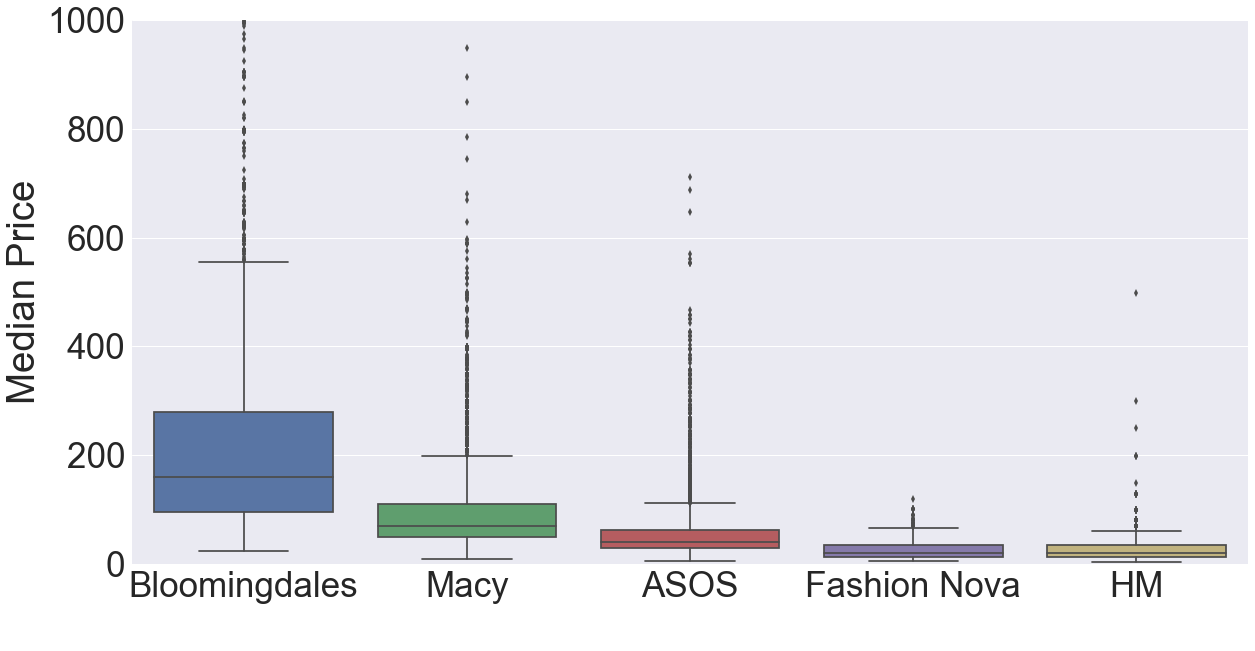

In [204]:
import seaborn as sns

# webscrape.boxplot(by="website", column="price",figsize=(13,12))
plt.figure(figsize=(20,10))
plt.ylim(0,1000)
sns.boxplot(x="website",y="price",data=webscrape,order=["Bloomingdales","Macy","ASOS","Fashion Nova","HM"])

plt.ylabel('Median Price')
plt.xlabel(" ")

### Original Data EDA

In [ ]:
print(all_data.shape)

In [ ]:
all_data.groupby("website").agg({"website":"count"}).sort_values(by="website",ascending=False)

In [ ]:
all_data.shape

In [ ]:
all_data

### Color Plate

In [ ]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [208]:
pal = sns.color_palette(current_palette)
pal.as_hex()

['#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974', '#64b5cd']

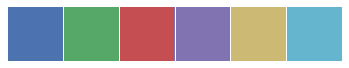

In [207]:
current_palette = sns.color_palette()
sns.palplot(current_palette)